In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
imdb_df = pd.read_csv('../python_learnings/imdb_top_1000.csv')

In [6]:
imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
print("The shape of the dataset is: {} rows and {} columns".format(imdb_df.shape[0], imdb_df.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


In [8]:
imdb_df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
imdb_df=imdb_df.rename(columns = {'Series_Title': 'Movies_Title'})

In [10]:
imdb_df.head(2)

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


# Lease important metric - the top voted movie.  We need to find the bottom rated movie.

In [13]:
top_voted = imdb_df.sort_values(['No_of_Votes'], ascending = False)

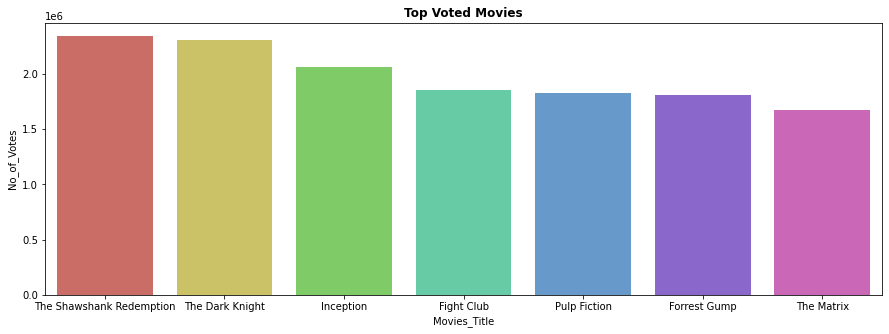

In [14]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

# Bottom voted

In [15]:
bottom_voted = imdb_df.sort_values(['No_of_Votes'], ascending = True)

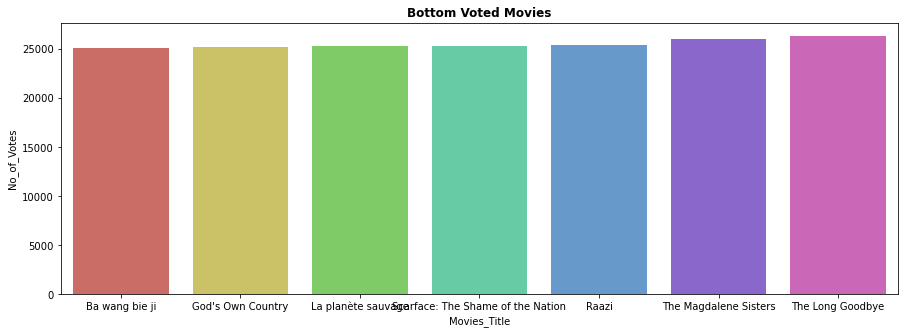

In [25]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=bottom_voted['Movies_Title'][:7],y=bottom_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Bottom Voted Movies", weight = "bold")
plt.show()

want meta score in the bottom

In [17]:
bottom_meta = imdb_df.sort_values(['Meta_score'], ascending = True)

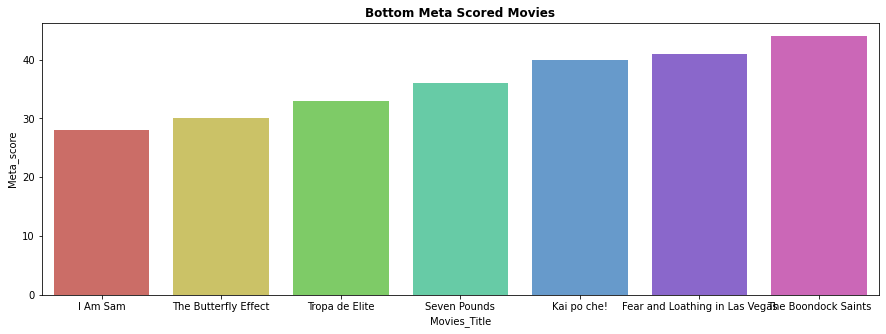

In [23]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=bottom_meta['Movies_Title'][:7],y=bottom_meta['Meta_score'][:7], palette = 'hls')
g.set_title("Bottom Meta Scored Movies", weight = "bold")
plt.show()

    Bottom IMDB score

In [40]:
bottom_imdb = imdb_df.sort_values(['IMDB_Rating'], ascending = True)

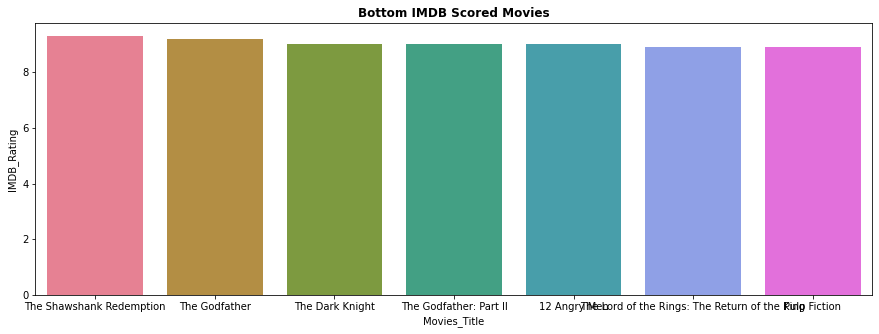

In [39]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=bottom_imdb['Movies_Title'][:7],y=bottom_imdb['IMDB_Rating'][:7], palette = 'husl')
g.set_title("Bottom IMDB Scored Movies", weight = "bold")
plt.show()


Filter by Action movies:

In [46]:
action_movies = imdb_df[imdb_df.Genre == 'Action']

In [59]:
stars = ['Star1', 'Star2', 'Star3', 'Star4']

In [65]:
action_movies_statham = action_movies[action_movies.Star4 == 'Jason Statham']

In [66]:
action_movies_statham.head()

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
161,https://m.media-amazon.com/images/M/MV5BMTAyN2...,"Lock, Stock and Two Smoking Barrels",1998,A,107 min,Action,8.2,A botched card game in London triggers four fr...,66.0,Guy Ritchie,Jason Flemyng,Dexter Fletcher,Nick Moran,Jason Statham,535216,"3,897,569"


In [47]:
action_movies.head()

#df_denver_county_home = df_median_home[df_median_home.CountyName == 'Denver County']

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Action,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,Action,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,Action,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,Action,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Sort action movies by worst rating:

In [48]:
bottom_action = action_movies.sort_values(['No_of_Votes'], ascending = True)

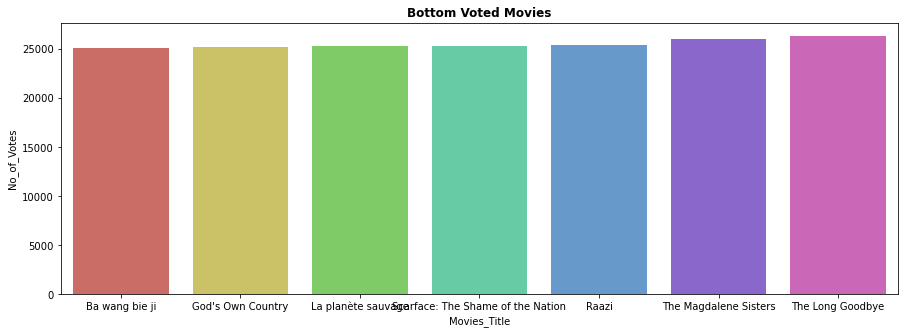

In [50]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=bottom_action['Movies_Title'][:7],y=bottom_action['No_of_Votes'][:7], palette = 'hls')
g.set_title("Bottom Voted Movies", weight = "bold")
plt.show()